# FIFA 20 Machine Learning Use Case - Predict if player has a traits 

In this case, we want to predict if the player in FIFA 20 has trait an **Early Crosser**. An Early Crosser itself described as a player with a tendency to perform a curly cross to the open spaces of opponent's penalty area before reaching the end line or corner flag.




## Getting Things Ready

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("data/players_20.csv")
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [10]:
df.columns.to_list()

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

## Personal Rationale

To make the complexity of model is small, the training will only use a attribute that related to the player's skills statistic (eg: dribbling, defending, attacking, etc). The player overall attributes in the specific position (eg: lb, lcb, cb) will be discarded. Some of the attributes also doesn't make sense to be used in the training phase. Eg: real_face which represent if the player has a real face in the FIFA games, player jersey number which doesn't seems has a impact to the training phase

From the personal feature selection, here is the attribute that will be included into ML model building. The `sofifa_id` and `short_name` only act as identifier. The early crosser trait available in the column `player_traits`

Identifier
- sofifa_id
- short_name

Feature
- age
- height_cm
- weight_kg
- nationality
- club
- overall
- potential
- value_eur
- wage_eur
- preferred_foot
- international_reputation
- weak_foot
- skill_moves
- work_rate
- release_clause_eur
- team_position
- nation_position
- pace
- shooting
- passing
- dribbling
- defending
- physic
- attacking_crossing
- attacking_finishing
- attacking_heading_accuracy
- attacking_short_passing
- attacking_volleys
- skill_dribbling
- skill_curve
- skill_fk_accuracy
- skill_long_passing
- skill_ball_control
- movement_acceleration
- movement_sprint_speed
- movement_agility
- movement_reactions
- movement_balance
- power_shot_power
- power_jumping
- power_stamina
- power_strength
- power_long_shots
- mentality_aggression
- mentality_interceptions
- mentality_positioning
- mentality_vision
- mentality_penalties
- mentality_composure
- defending_marking
- defending_standing_tackle
- defending_sliding_tackle

Target
- player_traits (only select the 'Early Crosser')


### Final check to the Early Crosser Traits

In [11]:
df[df['player_traits'].map(lambda x: 'Early Crosser' in str(x))].head(10)[['sofifa_id','short_name', 'player_traits']]

,sofifa_id,short_name,player_traits
0,158023,L. Messi,"Beat Offside Trap, Argues with Officials, Earl..."
1,20801,Cristiano Ronaldo,"Long Throw-in, Selfish, Argues with Officials,..."
2,190871,Neymar Jr,"Power Free-Kick, Injury Free, Selfish, Early C..."
9,209331,M. Salah,"Beat Offside Trap, Argues with Officials, Earl..."
10,231747,K. Mbappé,"Beat Offside Trap, Selfish, Early Crosser, Spe..."
26,202652,R. Sterling,"Selfish, Early Crosser"
37,188350,M. Reus,"Power Free-Kick, Avoids Using Weaker Foot, Bea..."
38,188567,P. Aubameyang,"Diver, Beat Offside Trap, Early Crosser, Speed..."
39,208722,S. Mané,"Selfish, Early Crosser"
43,200104,H. Son,"Diver, Beat Offside Trap, Argues with Official..."


In [12]:
df[df['player_traits'].map(lambda x: 'Early Crosser' not in str(x))].head(10)[['sofifa_id','short_name', 'player_traits']]

,sofifa_id,short_name,player_traits
3,200389,J. Oblak,"Flair, Acrobatic Clearance"
4,183277,E. Hazard,"Beat Offside Trap, Selfish, Finesse Shot, Spee..."
5,192985,K. De Bruyne,"Power Free-Kick, Avoids Using Weaker Foot, Div..."
6,192448,M. ter Stegen,"Swerve Pass, Acrobatic Clearance, Flair Passes"
7,203376,V. van Dijk,"Diver, Avoids Using Weaker Foot, Leadership, L..."
8,177003,L. Modrić,"Argues with Officials, Finesse Shot, Speed Dri..."
11,201024,K. Koulibaly,Long Passer (CPU AI Only)
12,202126,H. Kane,"Injury Free, Avoids Using Weaker Foot, Argues ..."
13,212831,Alisson,"Flair, Swerve Pass"
14,193080,De Gea,"Flair, Second Wind, Flair Passes"


## Data Preparation

In [13]:
loaded_column = [
    'sofifa_id',
    'short_name',
    'age',
    'height_cm',
    'weight_kg',
    'nationality',
    'club',
    'overall',
    'potential',
    'value_eur',
    'wage_eur',
    'preferred_foot',
    'international_reputation',
    'weak_foot',
    'skill_moves',
    'work_rate',
    'release_clause_eur',
    'team_position',
    'nation_position',
    'pace',
    'shooting',
    'passing',
    'dribbling',
    'defending',
    'physic',
    'attacking_crossing',
    'attacking_finishing',
    'attacking_heading_accuracy',
    'attacking_short_passing',
    'attacking_volleys',
    'skill_dribbling',
    'skill_curve',
    'skill_fk_accuracy',
    'skill_long_passing',
    'skill_ball_control',
    'movement_acceleration',
    'movement_sprint_speed',
    'movement_agility',
    'movement_reactions',
    'movement_balance',
    'power_shot_power',
    'power_jumping',
    'power_stamina',
    'power_strength',
    'power_long_shots',
    'mentality_aggression',
    'mentality_interceptions',
    'mentality_positioning',
    'mentality_vision',
    'mentality_penalties',
    'mentality_composure',
    'defending_marking',
    'defending_standing_tackle',
    'defending_sliding_tackle',
    'player_traits'
]

df_selected = df[loaded_column].copy()
df_selected['target'] = df_selected['player_traits'].map(lambda x: 1 if 'Early Crosser' in str(x) else 0)
df_selected = df_selected.drop(columns=['player_traits'])
df_selected

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,target
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,48,40,94,94,75,96,33,37,26,1
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,...,63,29,95,82,85,95,28,32,24,1
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,51,36,87,90,90,94,27,26,29,1
3,200389,J. Oblak,26,188,87,Slovenia,Atlético Madrid,91,93,77500000,...,34,19,11,65,11,68,27,12,18,0
4,183277,E. Hazard,28,175,74,Belgium,Real Madrid,91,91,90000000,...,54,41,87,89,88,91,34,27,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,Shao Shuai,22,186,79,China PR,Beijing Renhe FC,48,56,40000,...,46,48,28,25,39,41,45,50,52,0
18274,250995,Xiao Mingjie,22,177,66,China PR,Shanghai SIPG FC,48,56,40000,...,42,49,23,25,37,35,42,53,57,0
18275,252332,Zhang Wei,19,186,75,China PR,Hebei China Fortune FC,48,56,40000,...,50,45,38,38,36,39,46,52,46,0
18276,251110,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,...,57,49,31,48,36,40,39,44,54,0


## Explorative Data Analysis (EDA)

### Missing value checking

In [14]:
df_selected.isnull().sum()[df_selected.isnull().sum() > -1]

sofifa_id                         0
short_name                        0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
release_clause_eur             1298
team_position                   240
nation_position               17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy  

Checking each unique value of the feature

In [15]:
cols_to_check = [
    'release_clause_eur',    
    'team_position',
    'nation_position',       
    'pace',
    'shooting',               
    'passing',                
    'dribbling',              
    'defending',              
    'physic'                 
]

for col in cols_to_check:
    print("The unique value of the col:", col, "is:", df_selected[col].unique().tolist()[:10], "etcs...")

The unique value of the col: release_clause_eur is: [195800000.0, 96500000.0, 195200000.0, 164700000.0, 184500000.0, 166500000.0, 143400000.0, 150200000.0, 92300000.0, 148900000.0] etcs...
The unique value of the col: team_position is: ['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM'] etcs...
The unique value of the col: nation_position is: [nan, 'LS', 'LW', 'GK', 'LF', 'RCM', 'SUB', 'LCB', 'RW', 'RM'] etcs...
The unique value of the col: pace is: [87.0, 90.0, 91.0, nan, 76.0, 77.0, 74.0, 93.0, 96.0, 71.0] etcs...
The unique value of the col: shooting is: [92.0, 93.0, 85.0, nan, 83.0, 86.0, 60.0, 76.0, 84.0, 28.0] etcs...
The unique value of the col: passing is: [92.0, 82.0, 87.0, nan, 86.0, 70.0, 89.0, 81.0, 78.0, 54.0] etcs...
The unique value of the col: dribbling is: [96.0, 89.0, 95.0, nan, 94.0, 86.0, 71.0, 90.0, 67.0, 81.0] etcs...
The unique value of the col: defending is: [39.0, 35.0, 32.0, nan, 61.0, 90.0, 72.0, 45.0, 89.0, 47.0] etcs...
The unique value of the

As the result, we can fill the missing value of numerical feature using zero. While for the feature value in the categorical, especially for the position data, we can set them as OTHER position 

In [16]:
df_selected = df_selected.fillna(value={
    'release_clause_eur': 0,
    'team_position': 'OTHER',
    'nation_position': 'OTHER',
    'pace': 0,
    'shooting': 0,
    'passing': 0,
    'dribbling': 0,
    'defending': 0,
    'physic': 0
})

df_selected.isnull().sum()

sofifa_id                     0
short_name                    0
age                           0
height_cm                     0
weight_kg                     0
nationality                   0
club                          0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
preferred_foot                0
international_reputation      0
weak_foot                     0
skill_moves                   0
work_rate                     0
release_clause_eur            0
team_position                 0
nation_position               0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attacking_volleys             0
skill_dribbling               0
skill_cu

### Class imbalance check

In [17]:
df_selected.target.value_counts(normalize=True)

target
0    0.936098
1    0.063902
Name: proportion, dtype: float64

In [18]:
df_selected.target.value_counts()

target
0    17110
1     1168
Name: count, dtype: int64

In this dataset, the zero class (a non Early Crosser player) dominate the majority of the dataset. This will produce a high **True Negative** compared to what we actually need to predict (a **True Positive**). Therefore, it's important to perform a treatment to the imbalance class. In this case, the method **Random Undersampled Imbalance Datasets** will be used to balance the dataset. This will undersampled the zero class and put the data size same as the one-class.

In [19]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [20]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X_res, y_res = undersample.fit_resample(df_selected.drop(columns='target'), df_selected['target'])
df_undersample = pd.concat([X_res, y_res], axis=1)
df_undersample.sort_values(by='overall', ascending=False)

,sofifa_id,short_name,age,height_cm,weight_kg,nationality,club,overall,potential,value_eur,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,target
0,158023,L. Messi,32,170,72,Argentina,FC Barcelona,94,94,95500000,...,48,40,94,94,75,96,33,37,26,1
1,20801,Cristiano Ronaldo,34,187,83,Portugal,Juventus,93,93,58500000,...,63,29,95,82,85,95,28,32,24,1
2,190871,Neymar Jr,27,175,68,Brazil,Paris Saint-Germain,92,92,105500000,...,51,36,87,90,90,94,27,26,29,1
6,192448,M. ter Stegen,27,187,85,Germany,FC Barcelona,90,93,67500000,...,43,22,11,70,25,70,25,13,10,0
9,209331,M. Salah,27,175,71,Egypt,Liverpool,90,90,80500000,...,63,55,92,84,77,91,38,43,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18196,241306,Zhao Keda,20,173,64,China PR,Guangzhou R&F FC,49,65,60000,...,58,44,54,41,38,39,47,41,42,0
18276,251110,Wang Haijian,18,185,74,China PR,Shanghai Greenland Shenhua FC,48,54,40000,...,57,49,31,48,36,40,39,44,54,0
18245,252553,C. Pattison,18,185,70,England,Milton Keynes Dons,48,67,60000,...,45,28,48,45,37,45,41,48,43,0
18249,233667,Shan Huanhuan,20,185,75,China PR,Dalian YiFang FC,48,65,70000,...,35,27,44,38,45,45,30,27,26,0


### Check the distribution of each feature

In [21]:
df_undersample.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sofifa_id,2336.0,2.180579e+05,2.480930e+04,16097.0,203378.00,221854.0,236954.75,252905.0
age,2336.0,2.537586e+01,4.217431e+00,17.0,22.00,25.0,28.00,40.0
height_cm,2336.0,1.793711e+02,6.723006e+00,158.0,175.00,179.0,184.00,203.0
weight_kg,2336.0,7.373930e+01,6.879328e+00,54.0,69.00,73.0,78.00,110.0
overall,2336.0,6.818878e+01,6.870342e+00,48.0,64.00,68.0,73.00,94.0
potential,2336.0,7.282449e+01,6.330174e+00,50.0,68.00,72.0,77.00,95.0
value_eur,2336.0,3.825745e+06,7.946390e+06,0.0,500000.00,1100000.0,3825000.00,105500000.0
wage_eur,2336.0,1.373973e+04,2.900209e+04,0.0,2000.00,5000.0,14000.00,565000.0
international_reputation,2336.0,1.148116e+00,4.528055e-01,1.0,1.00,1.0,1.00,5.0
weak_foot,2336.0,3.073630e+00,6.911294e-01,1.0,3.00,3.0,3.00,5.0


IndexError: index 17 is out of bounds for axis 0 with size 17

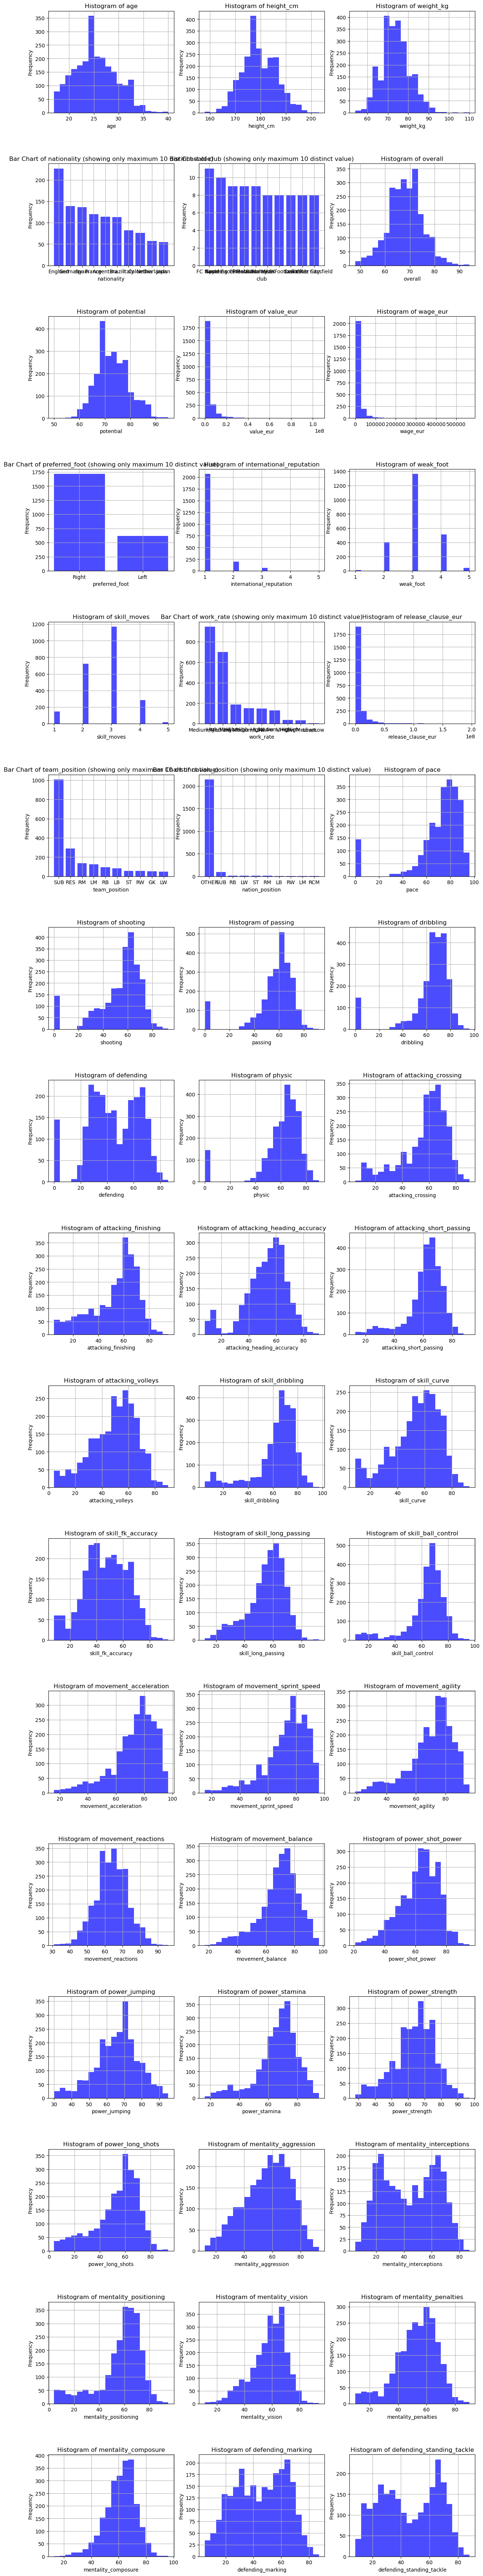

In [32]:
import matplotlib.pyplot as plt


# Set the number of rows (N) and columns (M) for the grid
total_col = len(df_undersample.drop(columns=['sofifa_id', 'short_name']).columns.to_list())
N, M = total_col // 3, 3

# Create subplots in a grid layout
fig, axes = plt.subplots(N, M, figsize=(15, 5 * (total_col // 3 + 1)))
fig.subplots_adjust(hspace=0.5)

for i, col_name in enumerate(df_undersample.drop(columns=['sofifa_id', 'short_name']).columns):
    row = i // M
    col = i % M

    ax = axes[row, col]

    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df_undersample[col_name]):
        ax.hist(df_undersample[col_name], bins=20, color='blue', alpha=0.7)
        ax.set_title(f'Histogram of {col_name}')
        ax.set_xlabel(col_name)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    else:
        categorical_counts = df_undersample[col_name].value_counts()[:10]
        # print(categorical_counts)
        ax.bar(categorical_counts.index, categorical_counts, color='blue', alpha=0.7)
        # categorical_counts.plot(kind='bar', color='green', alpha=0.7, ax=ax)
        ax.set_title(f'Bar Chart of {col_name} (showing only maximum 10 distinct value)')
        ax.set_xlabel(col_name)
        ax.set_ylabel('Frequency')
        ax.grid(True)
    # else:
    #     ax.axis('off')  # Don't display non-numeric columns

# Remove any empty subplots
for i in range(len(cols_to_check), N * M):
    row = i // M
    col = i % M
    fig.delaxes(axes[row, col])

plt.show()

### Feature Importance Analysis

In [22]:
categorical_cols, numerical_cols = [], []

for i, col_name in enumerate(df_undersample.drop(columns=['sofifa_id', 'short_name', 'target']).columns):
    # Check if the column is numerical
    if pd.api.types.is_numeric_dtype(df_undersample[col_name]):
        numerical_cols.append(col_name)
    else:
        categorical_cols.append(col_name)
categorical_cols, numerical_cols

(['nationality',
  'club',
  'preferred_foot',
  'work_rate',
  'team_position',
  'nation_position'],
 ['age',
  'height_cm',
  'weight_kg',
  'overall',
  'potential',
  'value_eur',
  'wage_eur',
  'international_reputation',
  'weak_foot',
  'skill_moves',
  'release_clause_eur',
  'pace',
  'shooting',
  'passing',
  'dribbling',
  'defending',
  'physic',
  'attacking_crossing',
  'attacking_finishing',
  'attacking_heading_accuracy',
  'attacking_short_passing',
  'attacking_volleys',
  'skill_dribbling',
  'skill_curve',
  'skill_fk_accuracy',
  'skill_long_passing',
  'skill_ball_control',
  'movement_acceleration',
  'movement_sprint_speed',
  'movement_agility',
  'movement_reactions',
  'movement_balance',
  'power_shot_power',
  'power_jumping',
  'power_stamina',
  'power_strength',
  'power_long_shots',
  'mentality_aggression',
  'mentality_interceptions',
  'mentality_positioning',
  'mentality_vision',
  'mentality_penalties',
  'mentality_composure',
  'defending_mar

In [23]:
from sklearn.metrics import mutual_info_score

for col in categorical_cols:
    print(col, round(mutual_info_score(df_undersample[col], df_undersample["target"]), 3))

nationality 0.049
club 0.19
preferred_foot 0.0
work_rate 0.12
team_position 0.125
nation_position 0.017


In [24]:
ft_analysis = {
    "col": [],
    "abs_corr": []
}
for col in numerical_cols:
    ft_analysis['col'].append(col)
    ft_analysis['abs_corr'].append(abs(round(df_undersample[col].corr(df_undersample["target"]), 3)))

pd.DataFrame(ft_analysis).sort_values(by='abs_corr')

,col,abs_corr
37,mentality_aggression,0.019
0,age,0.023
33,power_jumping,0.054
15,defending,0.063
19,attacking_heading_accuracy,0.083
43,defending_marking,0.100
7,international_reputation,0.110
35,power_strength,0.127
38,mentality_interceptions,0.128
44,defending_standing_tackle,0.146


The feature importance analysis suprisingly showed that the highly correlated attribute of early-crosser player is an attribute that related to the **movement** (agility, acceleration, sprint_speed, pace) rather than the attribute that related to the crossing itself (eg: attacking_crossing, passing, skill_curve, mentality_vision). On the categorical columns, seems like the **preferred foot** has no correlation toward the early crosser player trait. We can excluded them from the training phase

In [25]:
df_ready_to_used = df_undersample.copy()
used_cols = [col for col in categorical_cols if col != 'preferred_foot'] + numerical_cols + ['target']

df_ready_to_used = df_ready_to_used[used_cols]
df_ready_to_used

,nationality,club,work_rate,team_position,nation_position,age,height_cm,weight_kg,overall,potential,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,target
8834,Colombia,KRC Genk,Low/Medium,SUB,OTHER,20,178,67,66,77,...,50,63,20,36,34,58,62,65,65,0
9002,Albania,AC Ajaccio,Medium/Medium,RDM,OTHER,23,180,80,66,74,...,71,49,59,61,54,61,58,61,58,0
8125,Chile,Audax Italiano,Medium/Medium,SUB,OTHER,25,167,73,67,71,...,70,59,54,48,40,59,75,71,64,0
14123,United States,FC St. Gallen,Medium/Medium,SUB,OTHER,22,194,84,61,73,...,25,14,8,29,13,28,10,12,13,0
11837,Ethiopia,Sarpsborg 08 FF,High/Medium,SUB,OTHER,33,174,62,64,64,...,60,56,66,60,38,63,58,57,54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16802,Republic of Ireland,Shamrock Rovers,Medium/Medium,SUB,OTHER,20,178,76,56,71,...,46,10,53,50,54,54,29,13,19,1
16810,Australia,Western United FC,High/Medium,SUB,OTHER,19,168,63,56,70,...,50,48,52,39,33,50,50,50,51,1
17107,United States,Lincoln City,Medium/Medium,SUB,OTHER,18,181,77,55,73,...,25,18,56,46,54,35,19,17,18,1
17514,England,Gillingham,High/Medium,SUB,OTHER,19,187,82,54,65,...,51,20,50,31,49,47,18,15,21,1


## Model Training

### Split Train and Test

Ratio train/val/test = 60/20/20

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df_full_train, df_test = train_test_split(df_ready_to_used, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.target.values
y_val = df_val.target.values
y_test = df_test.target.values

del df_train['target']
del df_val['target']
del df_test['target']

dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

test_dict = df_test.to_dict(orient='records')
X_test = dv.transform(test_dict)

### Train Untuned Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [66]:
model.get_params()


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [67]:
y_pred = model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.7527552743823892

The untuned Logistic Regression got the roc auc score of **0.75**

### Tuned version of Logistic Regression

Using a RandomizedSearchCV instead of GridSearchCV to speed up training

In [75]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C' : [0.01, 0.1, 0.5, 10],
    'solver' : ['liblinear', 'lbfgs', 'newton-cg'],
    'max_iter': [1000],
    'tol': [0.00001, 0.0001, 0.001, 0.01]

}
grid_search = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_grid, n_iter=10, cv=5, verbose=3, n_jobs=-1, scoring='roc_auc', random_state=42)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.01;, score=0.640 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.01;, score=0.712 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.01;, score=0.673 total time=   0.2s
[CV 2/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.01;, score=0.710 total time=   0.2s
[CV 4/5] END C=10, max_iter=1000, solver=lbfgs, tol=1e-05;, score=0.692 total time=   0.4s
[CV 2/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.001;, score=0.710 total time=   0.1s
[CV 1/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.001;, score=0.673 total time=   0.2s
[CV 3/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.001;, score=0.639 total time=   0.1s
[CV 4/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.001;, score=0.712 total time=   0.1s
[CV 5/5] END C=0.5, max_iter=1000, solver=liblinear, tol=0.001;, score=0.724 total t

RandomizedSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
                   n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 0.5, 10],
                                        'max_iter': [1000],
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg'],
                                        'tol': [1e-05, 0.0001, 0.001, 0.01]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [76]:
final_model = grid_search.best_estimator_
final_model

LogisticRegression(C=0.5, max_iter=1000, random_state=42, solver='liblinear',
                   tol=1e-05)

In [80]:
y_pred = final_model.predict_proba(X_train)[:, 1]
print(f"Score on training set: {roc_auc_score(y_train, y_pred)}")

Score on training set: 0.9190250896057347


In [86]:
y_pred = final_model.predict_proba(X_val)[:, 1]
print(f"Score on validation set: {roc_auc_score(y_val, y_pred)}")

Score on validation set: 0.9167263046403115


In [87]:
y_pred = final_model.predict_proba(X_test)[:, 1]
print(f"Score on test set: {roc_auc_score(y_test, y_pred)}")

Score on test set: 0.9454581986227556


The best model from the tuned version of LogisticRegression is the model with params:
`LogisticRegression(C=0.5, max_iter=1000, random_state=42, solver='liblinear', tol=1e-05)`. It as ROC AUC score of **0.91** on validation set rather than non-tuned version of LR

### Trying Altreante Model: XGBoost

In [90]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/ee/2c/03d466d00818c8e0ffcf778946ca4a5e05694a11b85bc51f1bc5c18ca54e/xgboost-2.0.1-py3-none-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 981.1 kB/s eta 0:00:000:0100:07m


In [94]:
from xgboost import XGBClassifier

xgb_params = {
    'min_child_weight': [1, 5, 10],
    'max_depth': [3, 4, 5],
    'eta': [0.1, 0.3, 0.6],
}

xgb = XGBClassifier(objective='binary:logistic', nthread=8, seed=1, verbosity=1)
random_search = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter=15, scoring='roc_auc', n_jobs=4, cv=5, verbose=3, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END eta=0.1, max_depth=5, min_child_weight=10;, score=0.921 total time=   6.4s
[CV 3/5] END eta=0.1, max_depth=5, min_child_weight=10;, score=0.927 total time=   6.6s
[CV 2/5] END eta=0.1, max_depth=5, min_child_weight=10;, score=0.946 total time=   7.0s
[CV 4/5] END eta=0.1, max_depth=5, min_child_weight=10;, score=0.928 total time=   7.1s
[CV 1/5] END eta=0.3, max_depth=4, min_child_weight=5;, score=0.921 total time=   4.9s
[CV 2/5] END eta=0.3, max_depth=4, min_child_weight=5;, score=0.937 total time=   5.2s
[CV 5/5] END eta=0.1, max_depth=5, min_child_weight=10;, score=0.914 total time=   6.5s
[CV 3/5] END eta=0.3, max_depth=4, min_child_weight=5;, score=0.911 total time=   6.2s
[CV 4/5] END eta=0.3, max_depth=4, min_child_weight=5;, score=0.915 total time=   5.1s
[CV 1/5] END eta=0.3, max_depth=3, min_child_weight=1;, score=0.934 total time=   4.5s
[CV 5/5] END eta=0.3, max_depth=4, min_child_weight=5;, score=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           nthread=8, num_parallel_tree=None, ...),
                   n_iter=15, n_jobs=4,
                   param_distributions={'eta': [0.1, 0.3, 0.6],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10]},
                   random_state=42, scoring='roc_auc', verbose=3)

In [96]:
final_model = random_search.best_estimator_
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=10, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, nthread=8, ...)

We got a best **XGBClassifier** with parameter: `min_child_weight=10`, `eta=0.1` and `max_depth=3` 

In [97]:
y_pred = final_model.predict_proba(X_train)[:, 1]
print(f"Score on training set: {roc_auc_score(y_train, y_pred)}")

Score on training set: 0.9761272401433692


In [98]:
y_pred = final_model.predict_proba(X_val)[:, 1]
print(f"Score on validation set: {roc_auc_score(y_val, y_pred)}")

Score on validation set: 0.9172129505052529


In [99]:
y_pred = final_model.predict_proba(X_test)[:, 1]
print(f"Score on test set: {roc_auc_score(y_test, y_pred)}")

Score on test set: 0.9536412954134473


Using a Tuned XGBClassifier, there are improvement of roc_auc validation set score from 0.916 to 0.917 compared to the tuned LogisticRegression 

## Trainer Script

In [2]:
!python train.py

02:37:45 INFO:Loading dataset
02:37:46 INFO:Filling missing value...
02:37:46 INFO:Performing imbalance class removal by RandomUnderSampler
02:37:46 INFO:Identifying the dataset's categorical and numerical features
02:37:46 INFO:Non used feature for this training session is: ['preferred_foot']
02:37:46 INFO:Preparing the ready to use dataset
02:37:46 INFO:Performing train test split with ratio of 60/20/20
02:37:46 INFO:Converting train/test/val feature into dictvectorizer
02:37:46 INFO:Training XGBClassifier Model
02:37:46 INFO:Succesfully trained model
02:37:46 INFO:Score on validation set: 0.9172129505052529
02:37:46 INFO:Score on test set: 0.9536412954134473
02:37:46 INFO:Saving model into ./model/final_model_xgb.bin
02:37:46 INFO:Saving model into ./model/final_dv.bin


## Prepare the predict serving script

### Testing it on local first

In [4]:
!pip install pipenv

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pipenv from https://files.pythonhosted.org/packages/1c/18/5f429a08ae4d43d6037f9896c6f69f101900d8cb66afc0ccad1d592b3864/pipenv-2023.10.24-py3-none-any.whl.metadata
  Obtaining dependency information for virtualenv>=20.24.2 from https://files.pythonhosted.org/packages/7f/19/1f0eddcb9acf00a95793ce83417f69e0fd106c192121360af499cd6fde39/virtualenv-20.24.6-py3-none-any.whl.metadata
  Obtaining dependency information for distlib<1,>=0.3.7 from https://files.pythonhosted.org/packages/43/a0/9ba967fdbd55293bacfc1507f58e316f740a3b231fc00e3d86dc39bc185a/distlib-0.3.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for filelock<4,>=3.12.2 from https://files.pythonhosted.org/packages/81/54/84d42a0bee35edba99dee7b59a8d4970eccdd44b99fe728ed912106fc781/filelock-3.13.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 1.2 MB/s eta 0:00:0000:

In [7]:
!~/.local/bin/pipenv install
## or change to -> pipenv install

Pipfile.lock (c6dd79) out of date, updating to (260cd8)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠼ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (c871f291dace61f965d235edb2a82b5ea6883ddd6099a2a180f64925c5260cd8)!
Installing dependencies from Pipfile.lock (260cd8)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


Taking some sample data

In [35]:
early_crosser_player = df_selected[df_selected['target'] == 1].sample(5, random_state=42).drop(columns='target').to_dict('records')
early_crosser_player

[{'sofifa_id': 203588,
  'short_name': 'Q. Martinus',
  'age': 28,
  'height_cm': 183,
  'weight_kg': 70,
  'nationality': 'Curacao',
  'club': 'Urawa Red Diamonds',
  'overall': 69,
  'potential': 69,
  'value_eur': 1100000,
  'wage_eur': 7000,
  'preferred_foot': 'Left',
  'international_reputation': 1,
  'weak_foot': 3,
  'skill_moves': 3,
  'work_rate': 'High/Medium',
  'release_clause_eur': 1400000.0,
  'team_position': 'SUB',
  'nation_position': 'OTHER',
  'pace': 88.0,
  'shooting': 63.0,
  'passing': 66.0,
  'dribbling': 67.0,
  'defending': 42.0,
  'physic': 68.0,
  'attacking_crossing': 67,
  'attacking_finishing': 63,
  'attacking_heading_accuracy': 55,
  'attacking_short_passing': 66,
  'attacking_volleys': 61,
  'skill_dribbling': 67,
  'skill_curve': 64,
  'skill_fk_accuracy': 67,
  'skill_long_passing': 64,
  'skill_ball_control': 65,
  'movement_acceleration': 81,
  'movement_sprint_speed': 94,
  'movement_agility': 79,
  'movement_reactions': 58,
  'movement_balance':

In [36]:
non_early_crosser_player = df_selected[df_selected['target'] == 0].sample(5, random_state=42).drop(columns='target').to_dict('records')
non_early_crosser_player

[{'sofifa_id': 233841,
  'short_name': 'C. Cuesta',
  'age': 20,
  'height_cm': 178,
  'weight_kg': 67,
  'nationality': 'Colombia',
  'club': 'KRC Genk',
  'overall': 66,
  'potential': 77,
  'value_eur': 1000000,
  'wage_eur': 3000,
  'preferred_foot': 'Right',
  'international_reputation': 1,
  'weak_foot': 3,
  'skill_moves': 2,
  'work_rate': 'Low/Medium',
  'release_clause_eur': 1700000.0,
  'team_position': 'SUB',
  'nation_position': 'OTHER',
  'pace': 78.0,
  'shooting': 26.0,
  'passing': 44.0,
  'dribbling': 49.0,
  'defending': 64.0,
  'physic': 68.0,
  'attacking_crossing': 28,
  'attacking_finishing': 21,
  'attacking_heading_accuracy': 69,
  'attacking_short_passing': 66,
  'attacking_volleys': 33,
  'skill_dribbling': 40,
  'skill_curve': 32,
  'skill_fk_accuracy': 20,
  'skill_long_passing': 35,
  'skill_ball_control': 48,
  'movement_acceleration': 76,
  'movement_sprint_speed': 80,
  'movement_agility': 76,
  'movement_reactions': 61,
  'movement_balance': 69,
  'pow

In [40]:
import json

sample_for_test = early_crosser_player + non_early_crosser_player
with open('./data/sample_for_predict_test.json', 'w') as fp:
    json.dump(sample_for_test, fp)


In [44]:
!python predict-test.py

{"predictions":[{"sofifa_id":203588,"short_name":"Q. Martinus","probability":0.9020000100135803,"decision":true,"description":"Player has an Early Crosser trait"},{"sofifa_id":237683,"short_name":"N. Holland","probability":0.9290000200271606,"decision":true,"description":"Player has an Early Crosser trait"},{"sofifa_id":207807,"short_name":"R. Fraser","probability":0.9319999814033508,"decision":true,"description":"Player has an Early Crosser trait"},{"sofifa_id":230977,"short_name":"M. Almirón","probability":0.9480000138282776,"decision":true,"description":"Player has an Early Crosser trait"},{"sofifa_id":207651,"short_name":"Dolly Menga","probability":0.8690000176429749,"decision":true,"description":"Player has an Early Crosser trait"},{"sofifa_id":233841,"short_name":"C. Cuesta","probability":0.21199999749660492,"decision":false,"description":"Player doesn't has an Early Crosser trait"},{"sofifa_id":234983,"short_name":"Q. Laçi","probability":0.4300000071525574,"decision":false,"desc